## Exercises: 15. Plotting

#### Problem 1


a) Create a plot of $f(x) = \sinh x$, $g(x) = \cosh x $, and $h(x) = \tanh x$ in the $x$ range $[-5, 5]$ and the $y$ range [-5, 5] with an aspect ratio 1. Plot the $\tanh x$ with a dashed line. Add a legend in the lower right corner. Add the text $\cosh^2x - \sinh^2x = 1$ to the plot.

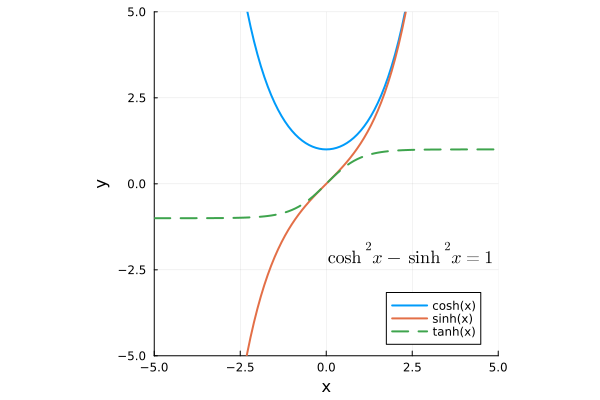

In [23]:
using Plots, LaTeXStrings

x = -5:0.1:5
y_cosh = cosh.(x)
y_sinh = sinh.(x)
y_tanh = tanh.(x)

plot(x, y_cosh, label="cosh(x)", xlabel="x", ylabel="y", linewidth=2, 
    aspect_ratio=:equal, xlims=(-5, 5), ylims=(-5, 5), legend=:bottomright)
plot!(x, y_sinh, label="sinh(x)", linewidth=2)
plot!(x, y_tanh, label="tanh(x)", linewidth=2, linestyle=:dash)

# Add LaTeX text
annotate!(0, -2, text(L"$\cosh^2 x - \sinh^2 x = 1$", :black, :left, 12))

b) Plot the standard normal distribution using `Distributions.jl` and fill the area under the curve in the range $[-1, 1]$ in blue with a transparency of 20%.

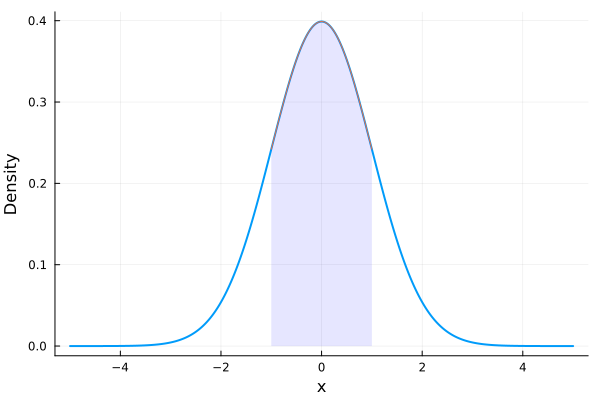

In [35]:
using Plots, Distributions

x = -5:0.01:5
y = pdf(Normal(0, 1), x) # Standard Gaussian distribution

plot(x, y, label="Gaussian Distribution", xlabel="x", ylabel="Density", linewidth=2)
x_fill = -1:0.01:1
y_fill = pdf(Normal(0, 1), x_fill)

# Fill the area under the curve between -1 and 1
plot!(x_fill, y_fill, fill=(0, :blue, 0.1), closed=true, legend=false)

c) Plot the data points below in red with error bars using square markers and a marker size of 5. Draw also the error bars in red and set their line width to 2. Don't plot a background grid. Set the font size of the tick labels to 12.

In [80]:
# data
x = [-0.6, -0.2, 0.2, 0.6]
y = [5., 3., 5., 8.]
σy = [2, 1, 1, 2];

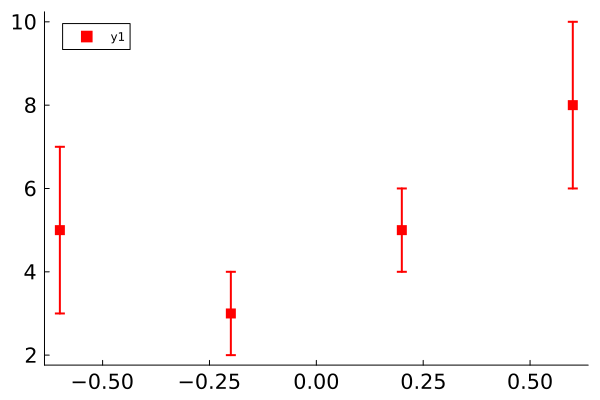

In [81]:
scatter(x, y, yerr=σy, markershape=:square, markersize=5, 
        markercolor=:red, errorbar=:cross, lw=2, linecolor=:red, grid=false, 
        markerstrokecolor = :red, tickfontsize=14)

d) The code below shows how one can get random numbers from the exponential distribution. 

In [50]:
using Distributions

# Set the parameters of the exponential distribution (rate parameter λ)
λ = 1

# Create an Exponential distribution object
exponential_dist = Exponential(λ)

# Generate random numbers from the exponential distribution
random_numbers = rand(exponential_dist, 5)

# Print the generated random numbers
println(random_numbers)

[1.1576157900552766, 1.1620558376751333, 2.2343774858567977, 1.432261249845253, 0.3409577451436549]


Create a 4-by-4 panel plot that shows a histogram of random numbers drawn from an exponential distribution for a sample size of 100, 1000, 10000, and 100000. Use 10, 20, 50, and 100 bins, respectively. Use a log scale.

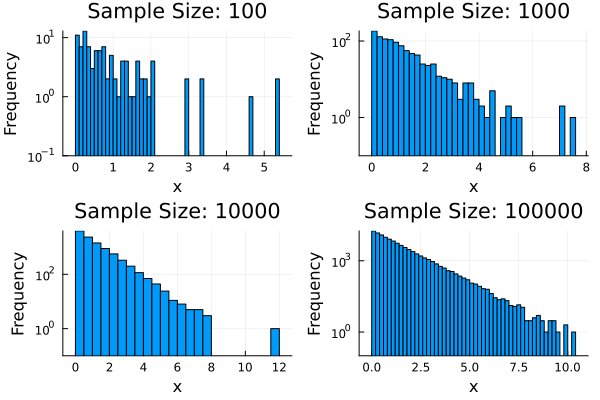

In [71]:
# Define sample sizes
sample_sizes = [100, 1000, 10000, 100000]
bins = [10, 20, 50, 100]

# Create a 4-by-4 panel plot
plot_layout = @layout [a b; c d]
p = plot(layout=plot_layout, legend=false)

# Loop over each sample size
for (i, n) in enumerate(sample_sizes)
    
    random_numbers =rand(exponential_dist, n)

    # Create histogram subplot
    histogram!(p[i], bins=50, random_numbers, title="Sample Size: $n", xlabel="x", ylabel="Frequency", yscale=:log10)
end

# Display the plot
p

e) Illustrate the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) by filling histograms with the mean of a random sample with a sample size of 2, 5, 10, 100. Do this 100000 times for each sample size.

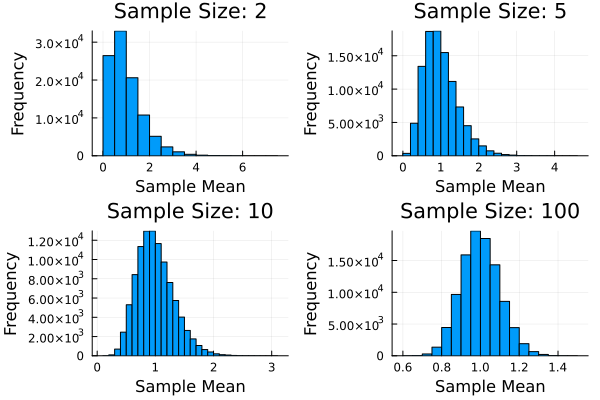

In [74]:
using Plots
using Distributions

# Parameters
sample_sizes = [2, 5, 10, 100]  # Different sample sizes
num_samples = 100000  # Number of samples for each size
λ = 1.0  # Rate parameter of the exponential distribution

# Function to calculate sample means
function calculate_sample_means(sample_size)
    means = Float64[]
    exponential_dist = Exponential(λ)
    for _ in 1:num_samples
        # Generate random numbers from the exponential distribution
        random_numbers = rand(exponential_dist, sample_size)
        # Calculate the sample mean
        sample_mean = mean(random_numbers)
        push!(means, sample_mean)
    end
    return means
end

# Generate sample means for different sample sizes
sample_means_data = Dict()
for sample_size in sample_sizes
    sample_means_data[sample_size] = calculate_sample_means(sample_size)
end

# Plot histograms of sample means
plot_layout = @layout [a b; c d]
p = plot(layout=plot_layout, legend=false)

for (i, sample_size) in enumerate(sample_sizes)
    histogram!(p[i], sample_means_data[sample_size], bins=30, title="Sample Size: $sample_size", xlabel="Sample Mean", ylabel="Frequency")
end

# Display the plot
p


#### Problem 2

Plot the [2D normal distribution](https://juliastats.org/Distributions.jl/stable/multivariate/#Distributions.AbstractMvNormal) with mean `μ = [0.0, 0.0]` and covariance matrix `Σ = [1.0 0.5; 0.5 1.0]` as a contour plot and as a 3D plot.

#### Solution

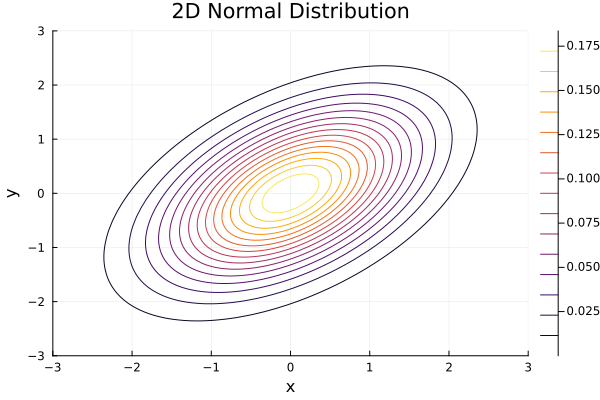

In [78]:
using Plots
using Distributions

# Define mean and covariance matrix for 2D normal distribution
μ = [0.0, 0.0]  # Mean vector
Σ = [1.0 0.5; 0.5 1.0]  # Covariance matrix

# Create 2D normal distribution object
normal_dist = MvNormal(μ, Σ)

# Generate grid points for x and y
x = range(-3, stop=3, length=100)
y = range(-3, stop=3, length=100)

# Evaluate the probability density function (pdf) at each grid point
pdf_values = [pdf(normal_dist, [xval, yval]) for xval in x, yval in y]

# Create contour plot
contour(x, y, pdf_values, xlabel="x", ylabel="y", title="2D Normal Distribution")